<a href="https://colab.research.google.com/github/Spyrx4/analisis_sentimen_merahputih_oneforall/blob/main/notebook/Proses_data_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
import string
import nltk
import html

In [173]:
df = pd.read_csv('smerahputih_oneforall.csv')

In [174]:
df.head()

,publishedAt,authorDisplayName,textDisplay,likeCount,type
0,2025-08-28T08:45:34Z,@SyafeQah1990,Cartoon ni masuk pawagam...??..,0,comment
1,2025-08-28T08:29:35Z,@HusnaNurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,comment
2,2025-08-28T08:14:10Z,@AlvinoAWP,Burung.nya.suara.monyet.cok🗿🗿,0,comment
3,2025-08-28T07:56:15Z,@arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,comment
4,2025-08-28T07:50:36Z,@galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1,comment


In [175]:
df

,publishedAt,authorDisplayName,textDisplay,likeCount,type
0,2025-08-28T08:45:34Z,@SyafeQah1990,Cartoon ni masuk pawagam...??..,0,comment
1,2025-08-28T08:29:35Z,@HusnaNurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,comment
2,2025-08-28T08:14:10Z,@AlvinoAWP,Burung.nya.suara.monyet.cok🗿🗿,0,comment
3,2025-08-28T07:56:15Z,@arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,comment
4,2025-08-28T07:50:36Z,@galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1,comment
...,...,...,...,...,...
4751,2025-08-11T08:57:24Z,@prod.starlight,​@@JustAnOrd1naryMankok XXI gaada trailer sih?...,6,reply
4752,2025-08-15T09:15:28Z,@dikaalvin657,Kalau fulus<br>Pasti mulus<br>😂😂😂,2,reply
4753,2025-08-15T23:23:43Z,@matthewbrealey2026,@@prod.starlight masuk di XXI loh,0,reply
4754,2025-08-09T04:07:03Z,@robbycarnando4512,Pengisi suara ny spa aj yahhh...,1,comment


In [176]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])


# Pisahkan menjadi dua kolom: tanggal dan waktu
df['tanggal'] = df['publishedAt'].dt.date
df['jam'] = df['publishedAt'].dt.time

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   publishedAt        4756 non-null   datetime64[ns, UTC]
 1   authorDisplayName  4756 non-null   object             
 2   textDisplay        4756 non-null   object             
 3   likeCount          4756 non-null   int64              
 4   type               4756 non-null   object             
 5   tanggal            4756 non-null   object             
 6   jam                4756 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 260.2+ KB


In [178]:
# clean data kolom authordisplayname
def clean_text(name):
    name = re.sub(r'^@', '', name)
    name = name.lower()
    return name

In [179]:
df['username'] = df['authorDisplayName'].apply(clean_text)

In [180]:
df  = pd.DataFrame(df[['tanggal','jam','username','textDisplay','likeCount']])

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      4756 non-null   object
 1   jam          4756 non-null   object
 2   username     4756 non-null   object
 3   textDisplay  4756 non-null   object
 4   likeCount    4756 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 185.9+ KB


In [182]:
# melihat data duplicate
df[df.duplicated(subset='textDisplay')]

,tanggal,jam,username,textDisplay,likeCount
47,2025-08-27,14:08:06,yoiki_kolip,Bajet miliarran grafik 80 an,0
234,2025-08-25,14:38:04,kutufilem,itu mau peramg apa gimana kok ada ak47 di gudang,0
254,2025-08-25,12:24:33,viovirza,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0
323,2025-08-24,21:22:28,juragangabah-m8b,👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎,0
407,2025-08-24,07:08:29,supplyoverload,Burik,0
...,...,...,...,...,...
4624,2025-08-11,06:20:58,iujenongg,"Bakalan abis tiket bioskop nya nanti, mengalah...",1
4635,2025-08-16,10:33:31,azkaalfaizi-d4n,😂😂,0
4645,2025-08-10,05:28:21,dutsukodutsu6117,😂😂😂😂,0
4660,2025-08-09,23:18:36,agegabut,Wtf,0


In [183]:
df.drop_duplicates(subset ="textDisplay", keep = 'first', inplace=True)

In [184]:
df.duplicated().sum()

np.int64(0)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4640 entries, 0 to 4755
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      4640 non-null   object
 1   jam          4640 non-null   object
 2   username     4640 non-null   object
 3   textDisplay  4640 non-null   object
 4   likeCount    4640 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 217.5+ KB


In [186]:
# mencari apakah ada data kosong
df.isnull().sum()

,0
tanggal,0
jam,0
username,0
textDisplay,0
likeCount,0


In [187]:
text = ' '.join(df['textDisplay'])

In [188]:
from collections import Counter

tokens = text.split()
word_counts = Counter(tokens)

In [189]:
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

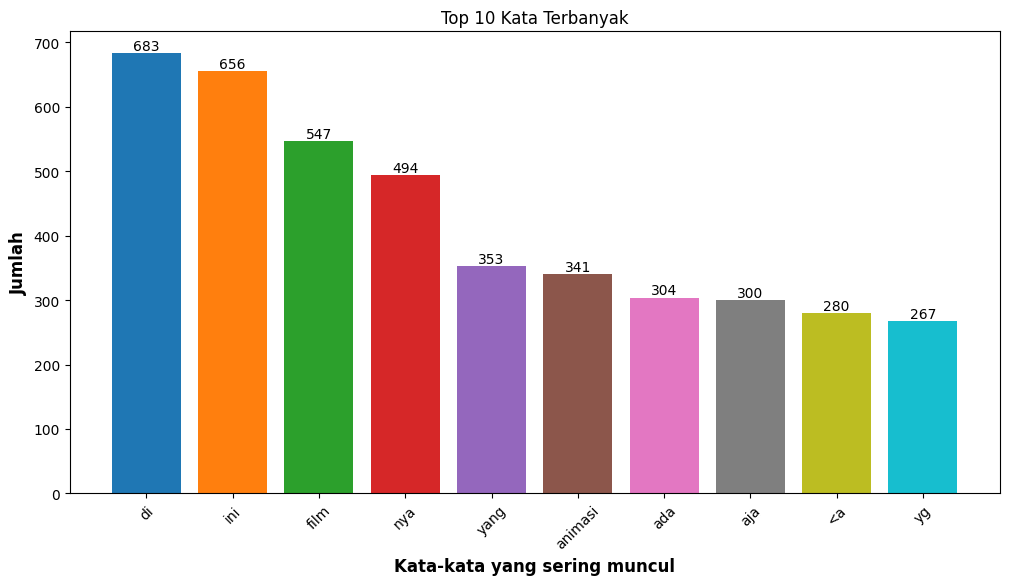

In [190]:
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel('Kata-kata yang sering muncul', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Top 10 Kata Terbanyak')

for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(num), ha='center', va='bottom', fontsize=10)

plt.show()

In [191]:
df

,tanggal,jam,username,textDisplay,likeCount
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam...??..,0
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0
2,2025-08-28,08:14:10,alvinoawp,Burung.nya.suara.monyet.cok🗿🗿,0
3,2025-08-28,07:56:15,arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1
...,...,...,...,...,...
4751,2025-08-11,08:57:24,prod.starlight,​@@JustAnOrd1naryMankok XXI gaada trailer sih?...,6
4752,2025-08-15,09:15:28,dikaalvin657,Kalau fulus<br>Pasti mulus<br>😂😂😂,2
4753,2025-08-15,23:23:43,matthewbrealey2026,@@prod.starlight masuk di XXI loh,0
4754,2025-08-09,04:07:03,robbycarnando4512,Pengisi suara ny spa aj yahhh...,1


In [192]:
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        # hapus tag html
        html_pattern = re.compile(r'<.*?>')
        cleaned_tweet = html_pattern.sub(r'', tweet)

        # Langkah 2: Dekode entitas HTML (misalnya &quot; menjadi ")
        cleaned_tweet = html.unescape(cleaned_tweet)

        # Ganti tanda titik dengan spasi
        cleaned_tweet = cleaned_tweet.replace('.', ' ')

        # Hapus tanda baca lainnya
        punctuation_pattern = re.compile(f"[{re.escape(string.punctuation)}]")
        cleaned_tweet = punctuation_pattern.sub(r'', cleaned_tweet)

        return cleaned_tweet
    else:
        return tweet

In [193]:
# fungsi menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile(
            "["
            "\U0001F600-\U0001F64F"  # emoticons
            "\U0001F300-\U0001F5FF"  # symbols & pictographs
            "\U0001F680-\U0001F6FF"  # transport & map symbols
            "\U0001F700-\U0001F77F"  # alchemical symbols
            "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            "\U0001FA00-\U0001FA6F"  # Chess Symbols
            "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            "\U00002702-\U000027B0"  # Additional emoticons (Dingbats)
            "\U000024C2-\U0001F251"  # Miscellaneous Symbols and Pictographs
            "\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "]+", flags=re.UNICODE)

        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

In [194]:
# fungsi menghapus simbol
def remove_symbols(tweet):
  if tweet is not None and isinstance(tweet, str):
      tweet = re.sub(r'[^a-zA-Z0-0\s]', ' ', tweet)
  return tweet

In [195]:
# fungsi menghapus angka
def remove_number(tweet):
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'\d+', '', tweet)
  return tweet

In [196]:
# hapus hastag
def hapus_hastag(teks):
  return re.sub(r'#\w+', '', teks).strip()

In [197]:

df['komentarBaru'] = df['textDisplay'].apply(lambda x: remove_html(x))
df['komentarBaru'] = df['komentarBaru'].apply(lambda x: remove_emoji(x))
df['komentarBaru'] = df['komentarBaru'].apply(lambda x: remove_symbols(x))
df['komentarBaru'] = df['komentarBaru'].apply(lambda x: remove_number(x))
df['komentarBaru'] = df['komentarBaru'].apply(lambda x: hapus_hastag(x))
# df['komentarBaru'] = df['komentarBaru'].apply(remove_number)

df.head(10)

,tanggal,jam,username,textDisplay,likeCount,komentarBaru
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam...??..,0,Cartoon ni masuk pawagam
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...
2,2025-08-28,08:14:10,alvinoawp,Burung.nya.suara.monyet.cok🗿🗿,0,Burung nya suara monyet cok
3,2025-08-28,07:56:15,arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,apalah ada AMK M
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini
5,2025-08-28,07:46:02,cloweystar,national disgrace. even a daz3d h*ntai is bett...,0,national disgrace even a daz d hntai is bette...
6,2025-08-28,07:32:15,haris1604-i3l,ASLI BURIQ - Lebih Bagus Grafik FREE FIRE 😁,0,ASLI BURIQ Lebih Bagus Grafik FREE FIRE
7,2025-08-28,07:01:48,afikakorizen,&quot;berhyenti Jan lanjyut&quot; suaranya sla...,0,berhyenti Jan lanjyut suaranya slay amat
8,2025-08-28,06:46:56,montero2iey,Tidakkan gua beli di pasar jrr pertualangannya...,0,Tidakkan gua beli di pasar jrr pertualangannya...
9,2025-08-28,06:35:57,ajengayuning17,Beta buka gudang benderanya hilank,1,Beta buka gudang benderanya hilank


In [198]:
# menghitung

In [199]:
# proses case folding
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

df['case_folding'] = df['komentarBaru'].apply(case_folding)
df.head(10)


,tanggal,jam,username,textDisplay,likeCount,komentarBaru,case_folding
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam...??..,0,Cartoon ni masuk pawagam,cartoon ni masuk pawagam
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yg katanya film mengeluarkan dan sampe mil...
2,2025-08-28,08:14:10,alvinoawp,Burung.nya.suara.monyet.cok🗿🗿,0,Burung nya suara monyet cok,burung nya suara monyet cok
3,2025-08-28,07:56:15,arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,apalah ada AMK M,apalah ada amk m
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini
5,2025-08-28,07:46:02,cloweystar,national disgrace. even a daz3d h*ntai is bett...,0,national disgrace even a daz d hntai is bette...,national disgrace even a daz d hntai is bette...
6,2025-08-28,07:32:15,haris1604-i3l,ASLI BURIQ - Lebih Bagus Grafik FREE FIRE 😁,0,ASLI BURIQ Lebih Bagus Grafik FREE FIRE,asli buriq lebih bagus grafik free fire
7,2025-08-28,07:01:48,afikakorizen,&quot;berhyenti Jan lanjyut&quot; suaranya sla...,0,berhyenti Jan lanjyut suaranya slay amat,berhyenti jan lanjyut suaranya slay amat
8,2025-08-28,06:46:56,montero2iey,Tidakkan gua beli di pasar jrr pertualangannya...,0,Tidakkan gua beli di pasar jrr pertualangannya...,tidakkan gua beli di pasar jrr pertualangannya...
9,2025-08-28,06:35:57,ajengayuning17,Beta buka gudang benderanya hilank,1,Beta buka gudang benderanya hilank,beta buka gudang benderanya hilank


In [200]:
import requests
from io import BytesIO

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

    data  = pd.DataFrame(df[['tanggal','jam','username','komentarBaru','likeCount']])

In [201]:
# # Unduh dan baca kamus dari GitHub
# url = "https://github.com/analysisdatasentiment/kamus_kata_baku/raw/main/kamuskatabaku.xlsx"
# response = requests.get(url)
# file_excel = BytesIO(response.content)
# kamus_data = pd.read_excel(file_excel)

kamus_data = pd.read_csv('kamuskatabaku.csv')

# Buat dictionary dari kamus
kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [202]:
# Terapkan fungsi normalisasi
df[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = df['case_folding'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku_dict))
)

# Ambil kolom yang relevan
df  = pd.DataFrame(df[['tanggal','jam','username','komentarBaru','likeCount', 'case_folding','normalisasi']])
df.head(5)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon ini masuk pawagam
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung nya suara monyet cok
3,2025-08-28,07:56:15,arkanpradipta8934,apalah ada AMK M,0,apalah ada amk m,apalah ada amk sama
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini


In [203]:
df.sample(10)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi
2472,2025-08-17,09:15:21,winzanims,Date Announcement Trailer Monsta Hype Train ...,0,date announcement trailer monsta hype train ...,date announcement trailer monsta hype train an...
1624,2025-08-19,04:22:33,firmansps,,0,,
1606,2025-08-19,05:17:04,mijaronlinedan1890,Najis film jelek animasi burik karakter nya se...,1,najis film jelek animasi burik karakter nya se...,najis film jelek animasi buruk karakter nya se...
4156,2025-08-14,10:39:26,aurrell.relrell22,Ini apaan nying,0,ini apaan nying,ini apaan nying
2589,2025-08-17,04:47:20,niketutediermini8882,Aduh nya kaya kebelet ek ek,0,aduh nya kaya kebelet ek ek,aduh nya kayak kebelet ek ek
2166,2025-08-18,00:33:19,antifreshpotato,Film kartun terjhembut,0,film kartun terjhembut,film kartun terjhembut
203,2025-08-26,04:32:29,maul-nsh,sakit mata jir,0,sakit mata jir,sakit mata jir
2776,2025-08-16,14:32:41,nadasetyawan7189,Ini yg buat animasi modal ordal ya pasti lul...,0,ini yg buat animasi modal ordal ya pasti lul...,ini yang membuat animasi modal ordal ya pasti ...
802,2025-08-22,03:49:13,seputar-roblox,Animasi jelek,0,animasi jelek,animasi jelek
348,2025-08-24,13:46:48,wadiitobingg538,Yg baju merah turun pochinki,0,yg baju merah turun pochinki,yang baju merah turun pochinki


In [204]:
# tokenization
def tokenize(text):
  tokens = text.split()
  return tokens
df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon ini masuk pawagam,"[cartoon, ini, masuk, pawagam]"
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...,"[ini, yang, katanya, film, mengeluarkan, dan, ..."
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung nya suara monyet cok,"[burung, nya, suara, monyet, cok]"
3,2025-08-28,07:56:15,arkanpradipta8934,apalah ada AMK M,0,apalah ada amk m,apalah ada amk sama,"[apalah, ada, amk, sama]"
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,"[bahkan, jurasik, park, lebih, bagus, dari, ini]"


In [205]:
# proses stopword removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [206]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df.head(5)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon ini masuk pawagam,"[cartoon, ini, masuk, pawagam]","[cartoon, masuk, pawagam]"
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...,"[ini, yang, katanya, film, mengeluarkan, dan, ...","[film, mengeluarkan, miliyaran, film, game, an..."
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung nya suara monyet cok,"[burung, nya, suara, monyet, cok]","[burung, nya, suara, monyet, cok]"
3,2025-08-28,07:56:15,arkanpradipta8934,apalah ada AMK M,0,apalah ada amk m,apalah ada amk sama,"[apalah, ada, amk, sama]","[apalah, amk]"
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,"[bahkan, jurasik, park, lebih, bagus, dari, ini]","[jurasik, park, bagus]"


In [207]:
# Proses steaming data
!pip install Sastrawi

In [208]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [209]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  return [stemmer.stem(word) for word in text]

df['stemming'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)


,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal,stemming
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon ini masuk pawagam,"[cartoon, ini, masuk, pawagam]","[cartoon, masuk, pawagam]",cartoon masuk pawagam
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...,"[ini, yang, katanya, film, mengeluarkan, dan, ...","[film, mengeluarkan, miliyaran, film, game, an...",film keluar miliyaran film game android karakt...
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung nya suara monyet cok,"[burung, nya, suara, monyet, cok]","[burung, nya, suara, monyet, cok]",burung nya suara monyet cok
3,2025-08-28,07:56:15,arkanpradipta8934,apalah ada AMK M,0,apalah ada amk m,apalah ada amk sama,"[apalah, ada, amk, sama]","[apalah, amk]",apa amk
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,"[bahkan, jurasik, park, lebih, bagus, dari, ini]","[jurasik, park, bagus]",jurasik park bagus


In [210]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4640 entries, 0 to 4755
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           4640 non-null   object
 1   jam               4640 non-null   object
 2   username          4640 non-null   object
 3   komentarBaru      4640 non-null   object
 4   likeCount         4640 non-null   int64 
 5   case_folding      4640 non-null   object
 6   normalisasi       4640 non-null   object
 7   tokenize          4640 non-null   object
 8   stopword removal  4640 non-null   object
 9   stemming          4640 non-null   object
dtypes: int64(1), object(9)
memory usage: 527.8+ KB


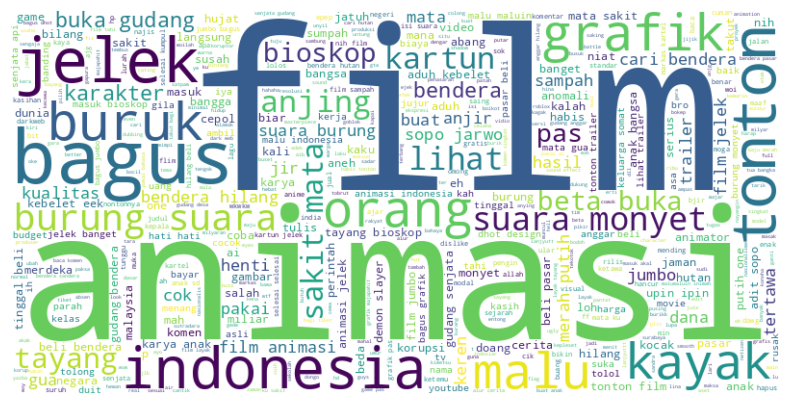

In [211]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# Menggabungkan teks dari kolom 'steming_data'
text = ' '.join(df['stemming'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','kak','deh','fyp', 'ya', 'gue', 'sih','yg','nya','aja','sdh','gak','ga','dm'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

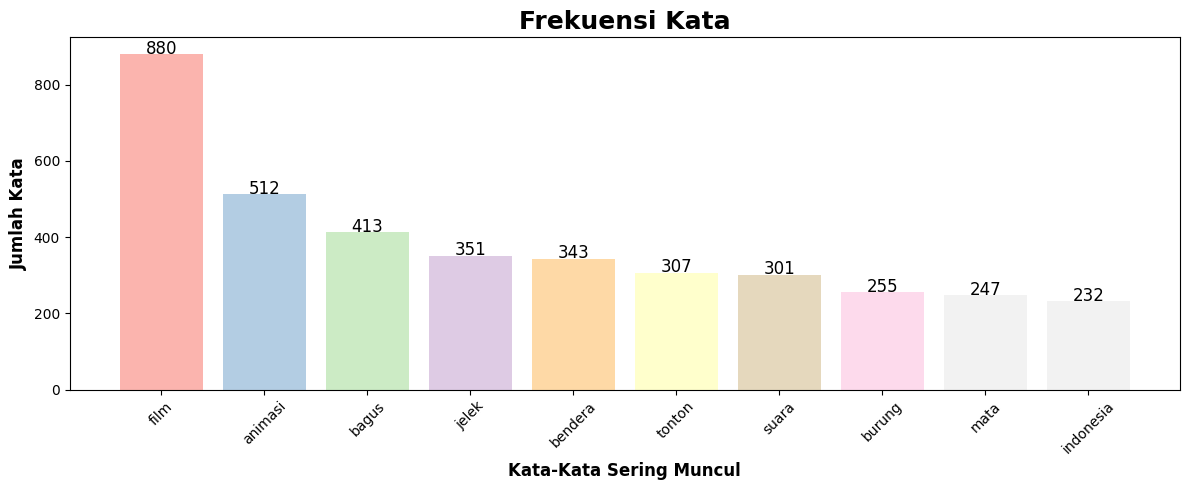

In [212]:
from collections import Counter
from wordcloud import STOPWORDS

all_text = ' '.join(df["stemming"].astype(str))
all_words = all_text.split()


stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'kak', 'deh', 'fyp', 'ya', 'gue', 'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga','dm'])

filtered_words = [word for word in all_words if word.lower() not in stopwords]
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

colors = plt.cm.Pastel1(range(len(word)))

# Plot
plt.figure(figsize=(12, 5))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Tampilkan jumlah di atas bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.tight_layout()
plt.show()

In [213]:
df.to_csv('Hasil_Preprocessing_Data.csv',encoding='utf8', index=False);

In [214]:
data = pd.read_csv('Hasil_Preprocessing_Data.csv')

In [215]:
data.sample(10)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal,stemming
1986,2025-08-18,05:51:38,viz_ai2670,Ya ampun pembuatannya mahal ko jadi kartun ent...,0,ya ampun pembuatannya mahal ko jadi kartun ent...,ya ampun pembuatannya mahal kok jadi kartun en...,"['ya', 'ampun', 'pembuatannya', 'mahal', 'kok'...","['ya', 'ampun', 'pembuatannya', 'mahal', 'kart...",ya ampun buat mahal kartun entong kartun dorae...
315,2025-08-25,01:26:52,arion021,Grafiknya jelek hanya edit doank,0,grafiknya jelek hanya edit doank,grafiknya jelek hanya edit doang,"['grafiknya', 'jelek', 'hanya', 'edit', 'doang']","['grafiknya', 'jelek', 'edit', 'doang']",grafik jelek edit doang
2666,2025-08-16,18:18:48,alvinkusuma8163,MATA GUA SAKIT ANJING,0,mata gua sakit anjing,mata gua sakit anjing,"['mata', 'gua', 'sakit', 'anjing']","['mata', 'gua', 'sakit', 'anjing']",mata gua sakit anjing
3146,2025-08-16,02:21:07,yatzz-tryhard,Grafik jaman MajapahitMasih kalah sama Film Jumbo,0,grafik jaman majapahitmasih kalah sama film jumbo,grafik jaman majapahitmasih kalah sama film jumbo,"['grafik', 'jaman', 'majapahitmasih', 'kalah',...","['grafik', 'jaman', 'majapahitmasih', 'kalah',...",grafik jaman majapahitmasih kalah film jumbo
2447,2025-08-17,08:20:08,fadil1102,Ini awal kehancuran cinepolis jika tetap menay...,0,ini awal kehancuran cinepolis jika tetap menay...,ini awal kehancuran cinepolis jika tetap menay...,"['ini', 'awal', 'kehancuran', 'cinepolis', 'ji...","['kehancuran', 'cinepolis', 'menayangkan', 'fi...",hancur cepol tayang film hancur
2771,2025-08-16,12:30:24,strasse130,NaN,0,NaN,NaN,[],[],NaN
3828,2025-08-14,14:53:24,agisalaziz,busukkkk,0,busukkkk,busukkkk,['busukkkk'],['busukkkk'],busukkkk
3672,2025-08-15,02:10:31,doyandolan,kok gak menarik gitu ya gambarnya,0,kok gak menarik gitu ya gambarnya,kok tidak menarik begitu ya gambarnya,"['kok', 'tidak', 'menarik', 'begitu', 'ya', 'g...","['menarik', 'ya', 'gambarnya']",tarik ya gambar
3826,2025-08-14,14:54:03,wartiwarti-hn1ws,Film Taek iki,0,film taek iki,film tahi iki,"['film', 'tahi', 'iki']","['film', 'tahi', 'iki']",film tahi iki
2633,2025-08-16,23:40:38,wahyunugraha1956,ANIMASI PALING JELEK YANG PERNAH GUE TONTON SE...,0,animasi paling jelek yang pernah gue tonton se...,animasi paling jelek yang pernah gue tonton se...,"['animasi', 'paling', 'jelek', 'yang', 'pernah...","['animasi', 'jelek', 'gue', 'tonton', 'seumur'...",animasi jelek gue tonton umur hidup gue


In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           4640 non-null   object
 1   jam               4640 non-null   object
 2   username          4640 non-null   object
 3   komentarBaru      4564 non-null   object
 4   likeCount         4640 non-null   int64 
 5   case_folding      4564 non-null   object
 6   normalisasi       4563 non-null   object
 7   tokenize          4640 non-null   object
 8   stopword removal  4640 non-null   object
 9   stemming          4513 non-null   object
dtypes: int64(1), object(9)
memory usage: 362.6+ KB


In [217]:
data.dropna(inplace=True)

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4513 entries, 0 to 4638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           4513 non-null   object
 1   jam               4513 non-null   object
 2   username          4513 non-null   object
 3   komentarBaru      4513 non-null   object
 4   likeCount         4513 non-null   int64 
 5   case_folding      4513 non-null   object
 6   normalisasi       4513 non-null   object
 7   tokenize          4513 non-null   object
 8   stopword removal  4513 non-null   object
 9   stemming          4513 non-null   object
dtypes: int64(1), object(9)
memory usage: 387.8+ KB


In [220]:
# Fungsi untuk menentukan sentimen
def determine_sentiment(text):
    positive_count = sum(1 for word in text.split() if word in positive_lexicon)
    negative_count = sum(1 for word in text.split() if word in negative_lexicon)
    if positive_count > negative_count:
        return "Positif"
    elif positive_count < negative_count:
        return "Negatif"

# Baca kamus leksikon positif dan negatif
positive_lexicon = set(pd.read_csv("positive.tsv", sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv("negative.tsv", sep="\t", header=None)[0])

def replace_none_sentiment(sentiments):
    replace_flag = "Positif"
    for i in range(len(sentiments)):
        if sentiments[i] is None:
            sentiments[i] = replace_flag
            replace_flag = "Negatif" if replace_flag == "Positif" else "Positif"
    return sentiments

data['sentiment'] = data['stemming'].apply(determine_sentiment)
data['sentiment'] = replace_none_sentiment(data['sentiment'].tolist())

In [221]:
data

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal,stemming,sentiment
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon ini masuk pawagam,"['cartoon', 'ini', 'masuk', 'pawagam']","['cartoon', 'masuk', 'pawagam']",cartoon masuk pawagam,Negatif
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...,"['ini', 'yang', 'katanya', 'film', 'mengeluark...","['film', 'mengeluarkan', 'miliyaran', 'film', ...",film keluar miliyaran film game android karakt...,Negatif
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung nya suara monyet cok,"['burung', 'nya', 'suara', 'monyet', 'cok']","['burung', 'nya', 'suara', 'monyet', 'cok']",burung nya suara monyet cok,Negatif
3,2025-08-28,07:56:15,arkanpradipta8934,apalah ada AMK M,0,apalah ada amk m,apalah ada amk sama,"['apalah', 'ada', 'amk', 'sama']","['apalah', 'amk']",apa amk,Negatif
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,"['bahkan', 'jurasik', 'park', 'lebih', 'bagus'...","['jurasik', 'park', 'bagus']",jurasik park bagus,Positif
...,...,...,...,...,...,...,...,...,...,...,...
4634,2025-08-09,12:20:23,justanord1naryman,Dari pemerintah bro membangkang auto hilang,13,dari pemerintah bro membangkang auto hilang,dari pemerintah bro membangkang auto hilang,"['dari', 'pemerintah', 'bro', 'membangkang', '...","['pemerintah', 'bro', 'membangkang', 'auto', '...",perintah bro bangkang auto hilang,Negatif
4635,2025-08-11,08:57:24,prod.starlight,JustAnOrd naryMankok XXI gaada trailer sih Gam...,6,justanord narymankok xxi gaada trailer sih gam...,justanord narymankok xxi trailer sih gamasuk x...,"['justanord', 'narymankok', 'xxi', 'trailer', ...","['justanord', 'narymankok', 'xxi', 'trailer', ...",justanord narymankok xxi trailer sih gamasuk x...,Positif
4636,2025-08-15,09:15:28,dikaalvin657,Kalau fulusPasti mulus,2,kalau fuluspasti mulus,kalau fuluspasti mulus,"['kalau', 'fuluspasti', 'mulus']","['fuluspasti', 'mulus']",fuluspasti mulus,Negatif
4637,2025-08-15,23:23:43,matthewbrealey2026,prod starlight masuk di XXI loh,0,prod starlight masuk di xxi loh,prod starlight masuk di xxi loh,"['prod', 'starlight', 'masuk', 'di', 'xxi', 'l...","['prod', 'starlight', 'masuk', 'xxi', 'loh']",prod starlight masuk xxi loh,Negatif


In [223]:
data['sentiment'].value_counts()

,count
sentiment,
Negatif,3036
Positif,1477


In [224]:
from sklearn.model_selection import train_test_split

x = data['stemming']
y = data['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [227]:
y_test.value_counts()

,count
sentiment,
Negatif,607
Positif,296


In [231]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, precision_recall_curve
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [232]:
vectorizer = TfidfVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 18121 stored elements and shape (3610, 4389)>

In [233]:
print('matriks vektorisasi untuk data train')
print(x_train_vectorized.toarray())

matriks vektorisasi untuk data train
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [237]:
classifier = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5,metric='euclidean')
}

In [241]:
n_classifiers = len(classifier)

for index, (name, classifier) in enumerate(classifier.items()):
    classifier.fit(x_train_vectorized, np.ravel(y_train))
    y_pred = classifier.predict(x_test_vectorized)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"accuracy (train) for : {name, accuracy*100}")
    print(classification_report(y_test, y_pred))

TypeError: object of type 'DecisionTreeClassifier' has no len()